# Data Design Assignment Report
##### StudentId: Stu155560
##### Name: Sikandar Ali

In [579]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose




# Read the data from CSV files
daily_activity = pd.read_csv(r'C:\Users\sikan\Documents\Data Design\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv')
calories_day = pd.read_csv(r'C:\Users\sikan\Documents\Data Design\Fitabase Data 4.12.16-5.12.16\dailyCalories_merged.csv')
hour_calories=pd.read_csv(r'C:\Users\sikan\Documents\Data Design\Fitabase Data 4.12.16-5.12.16\hourlyCalories_merged.csv')
hour_steps=pd.read_csv(r'C:\Users\sikan\Documents\Data Design\Fitabase Data 4.12.16-5.12.16\hourlysteps_merged.csv')

In [580]:
#Inspect the structure of the DataFrame and to get an idea of what kind of data is contained within it
print(hour_steps.head(5))
print(daily_activity.head(5))
print(calories_day.head(5))
print(hour_calories.head(5))

           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0         

In [581]:
# Get the number of observations and attributes
print(f'The daily activity dataset has {daily_activity.shape[0]} observations and {daily_activity.shape[1]} attributes.')
print(f'The calories_day dataset has {calories_day.shape[0]} observations and {calories_day.shape[1]} attributes.')
print(f'The hour_steps dataset has {hour_steps.shape[0]} observations and {hour_steps.shape[1]} attributes.')
print(f'The hour_calories dataset has {hour_calories.shape[0]} observations and {hour_calories.shape[1]} attributes.')


The daily activity dataset has 940 observations and 14 attributes.
The calories_day dataset has 940 observations and 3 attributes.
The hour_steps dataset has 22099 observations and 3 attributes.
The hour_calories dataset has 22099 observations and 3 attributes.


In [582]:
#checking the datatypes
# Print data types for daily_activity dataframe
print("Data Types for daily_activity:")
print(daily_activity.dtypes)
print()

# Print data types for calories_day dataframe
print("Data Types for calories_day:")
print(calories_day.dtypes)
print()

# Print data types for hour_steps dataframe
print("Data Types for hour_steps:")
print(hour_steps.dtypes)
print()

# Print data types for hour_calories dataframe
print("Data Types for hour_calories:")
print(hour_calories.dtypes)
print()

# Print the number of unique IDs for daily_activity dataframe
print("Number of Unique IDs in daily_activity:", daily_activity.Id.nunique())
print()

# Print the number of unique IDs for calories_day dataframe
print("Number of Unique IDs in calories_day:", calories_day.Id.nunique())
print()

# Print the number of unique IDs for hour_steps dataframe
print("Number of Unique IDs in hour_steps:", hour_steps.Id.nunique())
print()

# Print the number of unique IDs for hour_calories dataframe
print("Number of Unique IDs in hour_calories:", hour_calories.Id.nunique())


Data Types for daily_activity:
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
dtype: object

Data Types for calories_day:
Id              int64
ActivityDay    object
Calories        int64
dtype: object

Data Types for hour_steps:
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

Data Types for hour_calories:
Id               int64
ActivityHour    object
Calories         int64
dtype: object

Number of Unique IDs in daily_activity: 33

Number of Unique IDs in calories_day: 33

Number of Unique IDs in hour_

In [583]:
# get the set of unique IDs that exist in both tables
common_ids = set(daily_activity["Id"]).intersection(set(calories_day["Id"]))

# create new data frames with only the rows with common IDs
daily_activity = daily_activity[daily_activity["Id"].isin(common_ids)]
calories_day = calories_day[calories_day["Id"].isin(common_ids)]

# Cleaning Porcess

#### Processing Null Values

In [584]:
# Check for null values in daily_activity dataframe
print("Null Values in daily_activity:")
print(daily_activity.isnull().sum())
print()

# Check for null values in calories_day dataframe
print("Null Values in calories_day:")
print(calories_day.isnull().sum())
print()

# Check for null values in hour_steps dataframe
print("Null Values in hour_steps:")
print(hour_steps.isnull().sum())
print()

# Check for null values in hour_calories dataframe
print("Null Values in hour_calories:")
print(hour_calories.isnull().sum())


Null Values in daily_activity:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
dtype: int64

Null Values in calories_day:
Id             0
ActivityDay    0
Calories       0
dtype: int64

Null Values in hour_steps:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64

Null Values in hour_calories:
Id              0
ActivityHour    0
Calories        0
dtype: int64


#### Processing Duplicates Values

In [585]:
#Checking for duplicates
# Check for duplicate values in daily_activity dataframe
print("Duplicate Values in daily_activity:")
print(daily_activity.duplicated().sum())
print()

# Check for duplicate values in calories_day dataframe
print("Duplicate Values in calories_day:")
print(calories_day.duplicated().sum())
print()

# Check for duplicate values in hour_steps dataframe
print("Duplicate Values in hour_steps:")
print(hour_steps.duplicated().sum())
print()

# Check for duplicate values in hour_calories dataframe
print("Duplicate Values in hour_calories:")
print(hour_calories.duplicated().sum())


Duplicate Values in daily_activity:
0

Duplicate Values in calories_day:
0

Duplicate Values in hour_steps:
0

Duplicate Values in hour_calories:
0


In [586]:
#Checking for missing value
# Check for missing values in daily_activity dataframe
print("Missing Values in daily_activity:")
print(daily_activity.isna().sum())
print()

# Check for duplicate values in calories_day dataframe
print("Missing Values in calories_day:")
print(calories_day.isna().sum())
print()

# Check for duplicate values in hour_steps dataframe
print("Missing Values in hour_steps:")
print(hour_steps.isna().sum())
print()

# Check for duplicate values in hour_calories dataframe
print("Missing Values in hour_calories:")
print(hour_calories.isna().sum())

Missing Values in daily_activity:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
dtype: int64

Missing Values in calories_day:
Id             0
ActivityDay    0
Calories       0
dtype: int64

Missing Values in hour_steps:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64

Missing Values in hour_calories:
Id              0
ActivityHour    0
Calories        0
dtype: int64


### Data Transformation

In [587]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

In [588]:
calories_day = calories_day.rename(columns={'ActivityDay': 'Date'})

In [589]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

In [590]:
calories_day['Date'] = pd.to_datetime(calories_day['Date'])

In [591]:
daily_activity['DayOfWeek'] = daily_activity['Date'].dt.day_name()

In [592]:
calories_day['DayofWeek'] = calories_day['Date'].dt.day_name()

In [593]:
# Merge the two tables on 'Id' and 'date' columns
merged_data = pd.merge(daily_activity, calories_day, on=['Id', 'Date'])
hour_data = pd.merge(hour_calories,hour_steps,on = ["Id","ActivityHour"])

In [594]:
hour_data['Hour'] = pd.to_datetime(hour_data['ActivityHour']).dt.hour


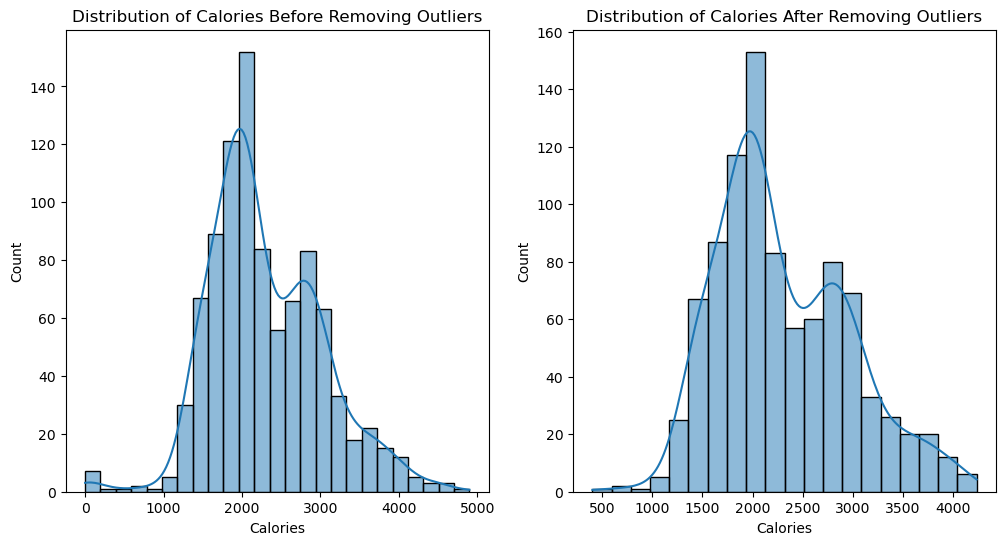

In [595]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(merged_data["Calories"], kde=True, ax=axs[0])
axs[0].set_title("Distribution of Calories Before Removing Outliers")

# Remove the outliers using the IQR method
q1 = merged_data["Calories"].quantile(0.25)
q3 = merged_data["Calories"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
merged_data = merged_data[(merged_data["Calories"] > lower_bound) & (merged_data["Calories"] < upper_bound)]

sns.histplot(merged_data["Calories"], kde=True, ax=axs[1])
axs[1].set_title("Distribution of Calories After Removing Outliers")

plt.show()

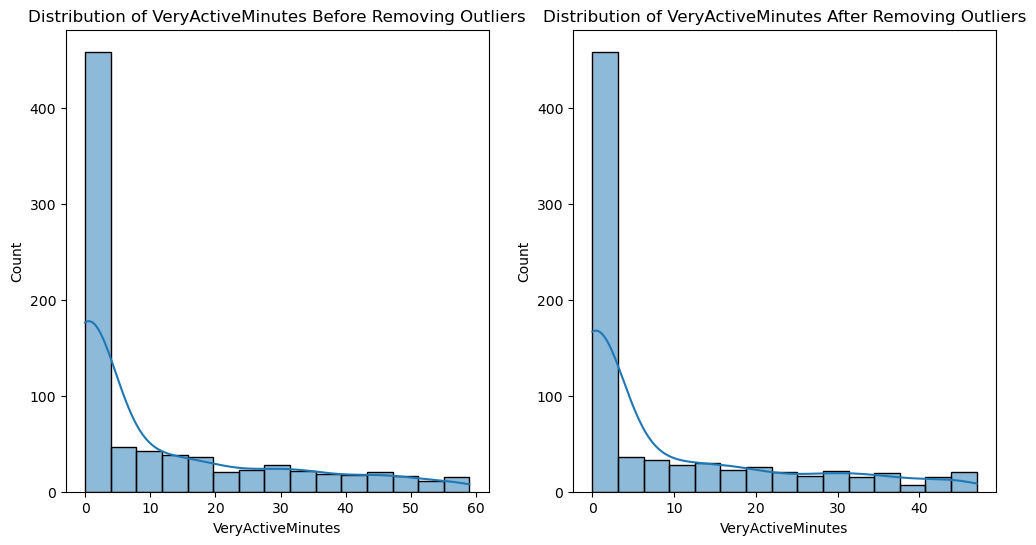

In [598]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(merged_data["VeryActiveMinutes"], kde=True, ax=axs[0])
axs[0].set_title("Distribution of VeryActiveMinutes Before Removing Outliers")

# Remove the outliers using the IQR method
q1 = merged_data["VeryActiveMinutes"].quantile(0.25)
q3 = merged_data["VeryActiveMinutes"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
merged_data = merged_data[(merged_data["VeryActiveMinutes"] > lower_bound) & (merged_data["VeryActiveMinutes"] < upper_bound)]

sns.histplot(merged_data["VeryActiveMinutes"], kde=True, ax=axs[1])
axs[1].set_title("Distribution of VeryActiveMinutes After Removing Outliers")

plt.show()

### Exploration Data Analysis

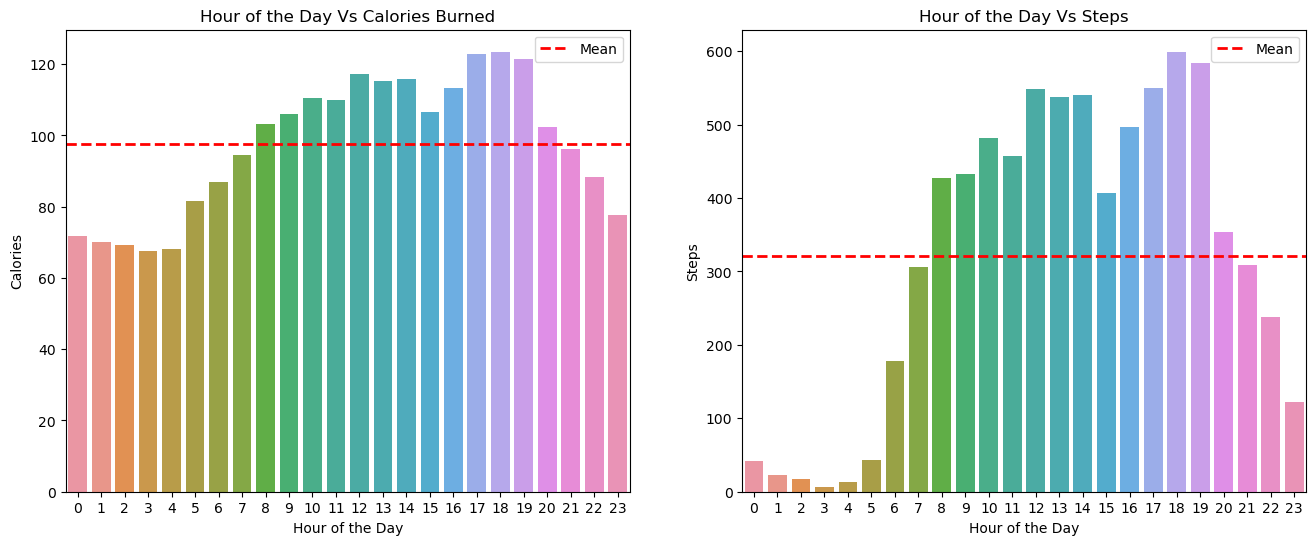

In [612]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Plot for calories burned by hour
hour_Calories = hour_data.groupby(['Hour']).agg({'Calories':'mean'}).reset_index()
sns.barplot(x = 'Hour',y = 'Calories',data = hour_Calories, ax=ax1)
ax1.set(xlabel='Hour of the Day', ylabel='Calories',title = 'Hour of the Day Vs Calories Burned')
mean_calories = hour_Calories['Calories'].mean()
ax1.axhline(mean_calories, color='r', linestyle='--', linewidth=2, label='Mean')
ax1.legend()

# Plot for steps taken by hour
hour_Steps = hour_data.groupby(['Hour']).agg({'StepTotal':'mean'}).reset_index()
sns.barplot(x = 'Hour',y = 'StepTotal',data = hour_Steps, ax=ax2)
ax2.set(xlabel='Hour of the Day', ylabel='Steps',title = 'Hour of the Day Vs Steps')
mean_steps = hour_Steps['StepTotal'].mean()
ax2.axhline(mean_steps, color='r', linestyle='--', linewidth=2, label='Mean')
ax2.legend()

plt.show()

In [602]:
merged_data.set_index('Date', inplace=True)


In [603]:
merged_data = merged_data.resample('D').sum()

C:\Users\sikan\AppData\Local\Temp\ipykernel_18704\1879576945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data = merged_data.resample('D').sum()


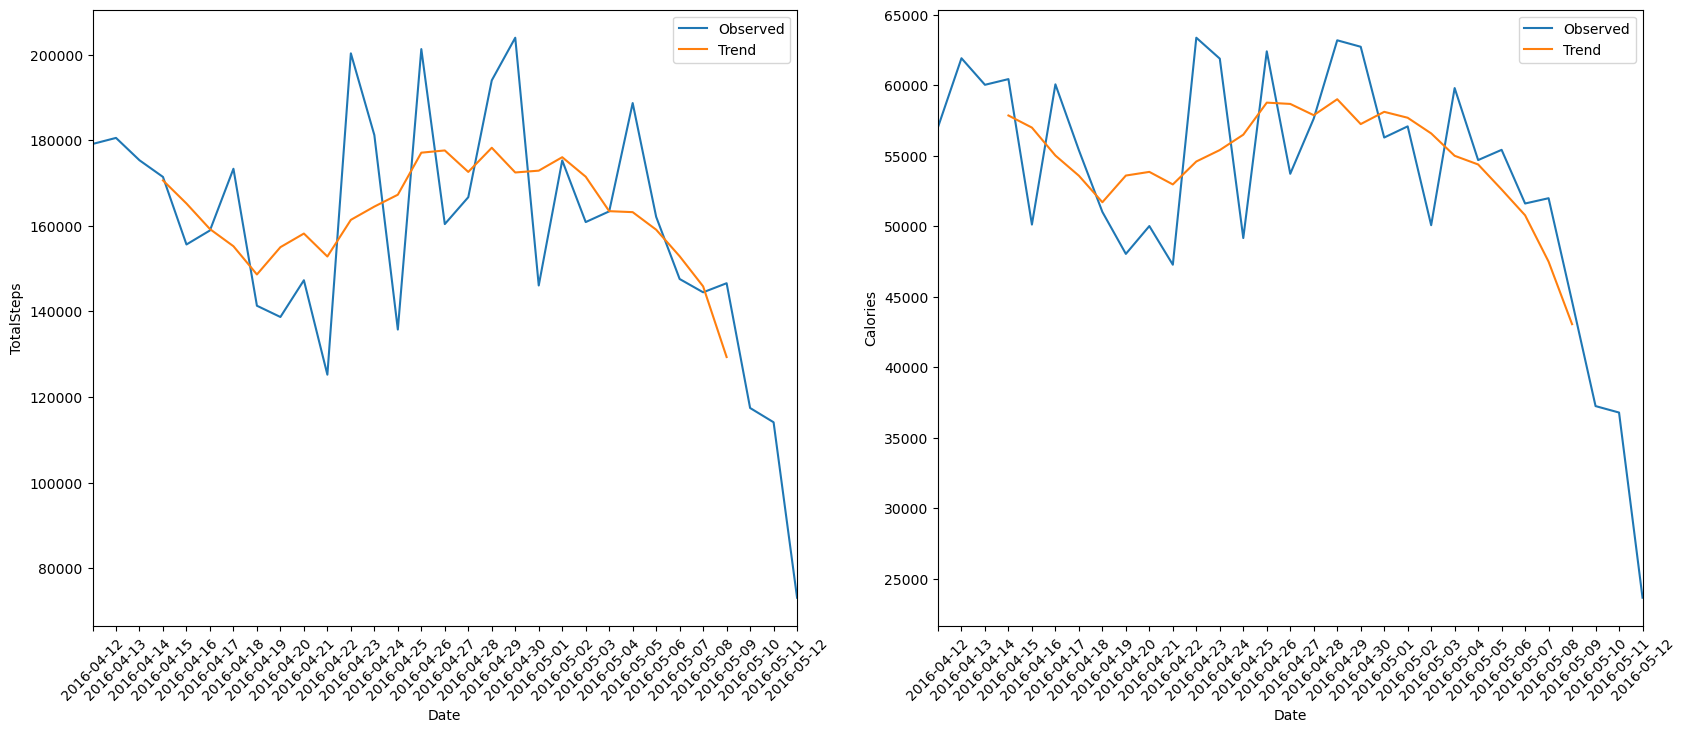

In [611]:
# Perform seasonal decomposition for TotalSteps
result = seasonal_decompose(merged_data['TotalSteps'], model='additive', period=7)

# Perform seasonal decomposition for Calories
result1 = seasonal_decompose(merged_data['Calories'], model='additive', period=7)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot TotalSteps decomposition
result.observed.plot(ax=axs[0], label='Observed')
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('TotalSteps')
axs[0].set_xticks(result.observed.index)
axs[0].set_xticklabels(result.observed.index.strftime('%Y-%m-%d'), rotation=45)
axs[0].legend()

# Plot Calories decomposition
result1.observed.plot(ax=axs[1], label='Observed')
result1.trend.plot(ax=axs[1], label='Trend')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Calories')
axs[1].set_xticks(result1.observed.index)
axs[1].set_xticklabels(result1.observed.index.strftime('%Y-%m-%d'), rotation=45)
axs[1].legend()

plt.show()


In [606]:
# Calculate the correlation coefficient using numpy's corrcoef function
correlation = np.corrcoef(merged_data['TotalSteps'], merged_data['Calories'])[0, 1]

print('The correlation between Totalsteps and Calories is:', correlation)

The correlation between Totalsteps and Calories is: 0.9176915851890816


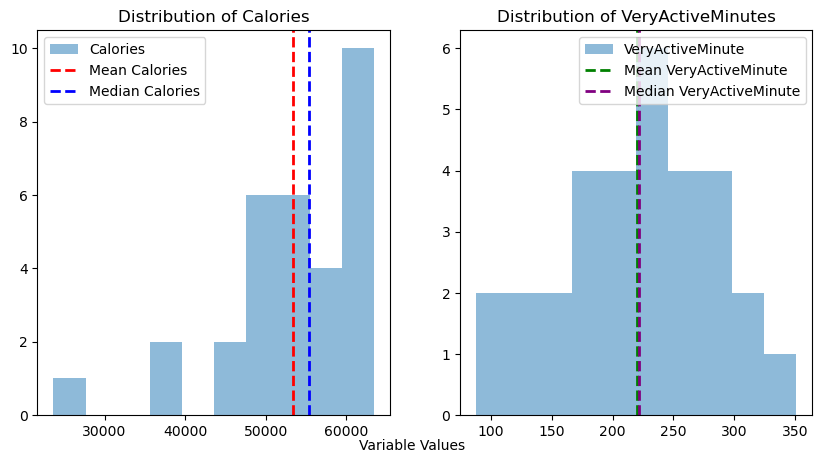

In [613]:
# Calculate mean, median, and standard deviation of 'Calories' variable
mean_calories = np.mean(merged_data['Calories'])
median_calories = np.median(merged_data['Calories'])
std_calories = np.std(merged_data['Calories'])

# Calculate mean, median, and standard deviation of 'VeryActiveMinute' variable
mean_very_active = np.mean(merged_data['VeryActiveMinutes'])
median_very_active = np.median(merged_data['VeryActiveMinutes'])
std_very_active = np.std(merged_data['VeryActiveMinutes'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for 'Calories'
ax1.hist(merged_data['Calories'], alpha=0.5, label='Calories')
ax1.axvline(mean_calories, color='red', linestyle='dashed', linewidth=2, label='Mean Calories')
ax1.axvline(median_calories, color='blue', linestyle='dashed', linewidth=2, label='Median Calories')
ax1.legend()
ax1.set_title('Distribution of Calories')

# Plot histogram for 'VeryActiveMinutes'
ax2.hist(merged_data['VeryActiveMinutes'], alpha=0.5, label='VeryActiveMinute')
ax2.axvline(mean_very_active, color='green', linestyle='dashed', linewidth=2, label='Mean VeryActiveMinute')
ax2.axvline(median_very_active, color='purple', linestyle='dashed', linewidth=2, label='Median VeryActiveMinute')
ax2.legend()
ax2.set_title('Distribution of VeryActiveMinutes')

# Add a common x-axis label and show the plot
fig.text(0.5, 0.04, 'Variable Values', ha='center')
plt.show()


Intercept: 31698.753412671682
Coefficient: 98.44549827388434


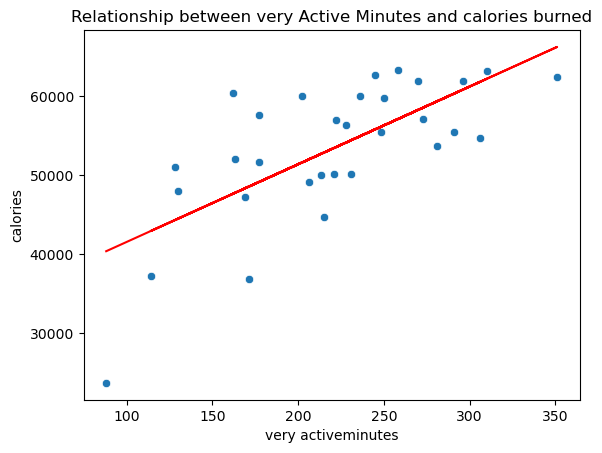

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     26.83
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.54e-05
Time:                        23:58:35   Log-Likelihood:                -315.23
No. Observations:                  31   AIC:                             634.5
Df Residuals:                      29   BIC:                             637.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               3.17e+04   4349.38

In [610]:

X = merged_data['VeryActiveMinutes'].values.reshape((-1, 1))
y = merged_data['Calories'].values
model = LinearRegression()

model.fit(X, y)
# Print the model coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])
sns.scatterplot(x='VeryActiveMinutes', y='Calories', data=merged_data)
# Plot the regression line
y = model.predict(X)
plt.plot(X, y, color='red')
# Add labels and title
plt.xlabel('very activeminutes')
plt.ylabel('calories')
plt.title('Relationship between very Active Minutes and calories burned')
plt.show()
X = sm.add_constant(merged_data['VeryActiveMinutes'])
y = merged_data['Calories']
model = sm.OLS(y, X).fit()
print(model.summary())

#### P value  is 0.000 <0.05 significane level. This demonstrates that there is sufficient data to reject the null hypothesis and infer that the number of steps taken has a substantial influence on the number of calories burnt.
